In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = r"C:\Skin Cancerdetection\skin_cancer_detection_using_deeplearning\skin_cancer_detection_using_deeplearning\archive (2)\train"

In [3]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_using_deeplearning\\archive (2)\\train\\benign\\100.jpg',
 'C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_using_deeplearning\\archive (2)\\train\\benign\\1000.jpg',
 'C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_using_deeplearning\\archive (2)\\train\\benign\\1001.jpg',
 'C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_using_deeplearning\\archive (2)\\train\\benign\\1002.jpg',
 'C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_using_deeplearning\\archive (2)\\train\\benign\\1004.jpg',
 'C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_using_deeplearning\\archive (2)\\train\\benign\\1005.jpg',
 'C:\\Skin Cancerdetection\\skin_cancer_detection_using_deeplearning\\skin_cancer_detection_usi

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,C:\Skin Cancerdetection\skin_cancer_detection_...,benign
1,C:\Skin Cancerdetection\skin_cancer_detection_...,benign
2,C:\Skin Cancerdetection\skin_cancer_detection_...,malignant
3,C:\Skin Cancerdetection\skin_cancer_detection_...,benign
4,C:\Skin Cancerdetection\skin_cancer_detection_...,benign


In [8]:
#balancing

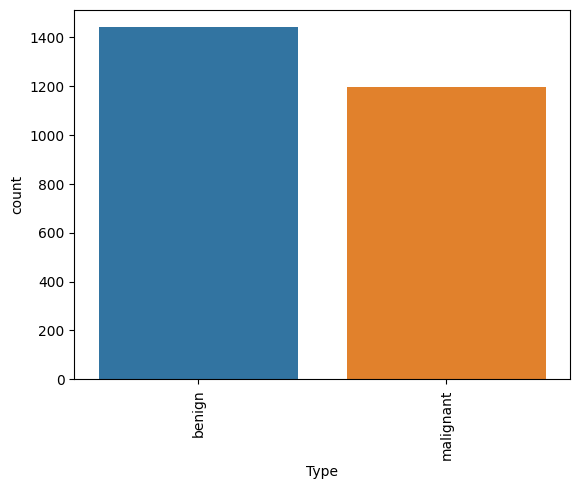

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
train, test = train_test_split(data, test_size=0.25, random_state=42)
#random_state=42: Ensures the split is reproducible by using a fixed seed for randomness

By setting random_state=42, we ensuring that the data split is consistent across different runs of the code. Without a fixed seed, the randomness might result in slightly different splits each time you run the code, which could make it harder to compare results.

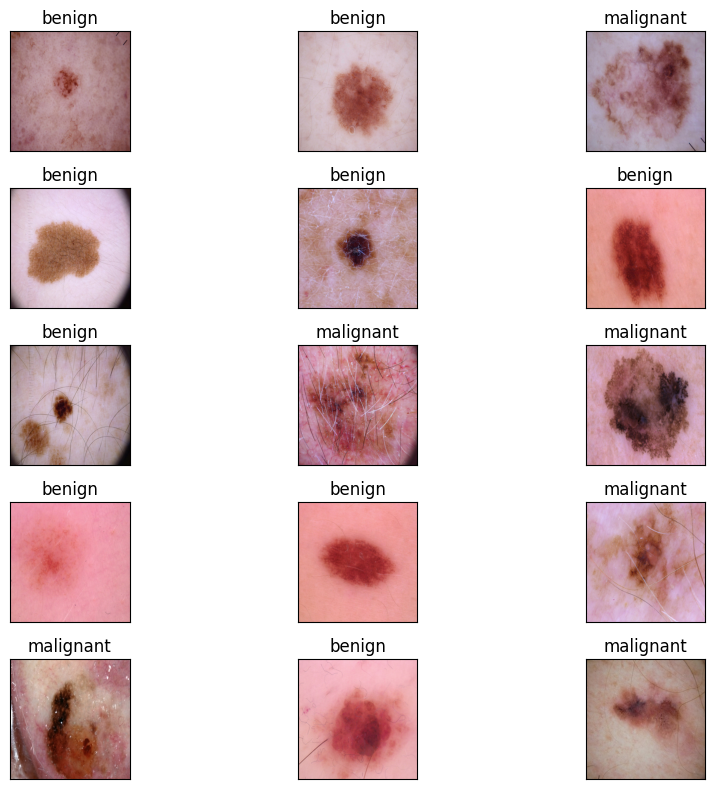

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [12]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


This is setting up data augmentation pipelines for both training and testing using ImageDataGenerator from Keras, and applying a preprocessing function specifically designed for the ResNet50 model.

ImageDataGenerator generates batches of image data with real-time data augmentation. In this case, you are using it to preprocess images for compatibility with the ResNet50 model.

ImageDataGenerator generates batches of image data with real-time data augmentation. In this case, you are using it to preprocess images for compatibility with the ResNet50 model.

This code creates data generators for training, validation, and testing using Keras' ImageDataGenerator

In [13]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


The ImageDataGenerator is a utility from Keras that generates batches of tensor image data with real-time data augmentation. It ensures that large datasets are fed into the model efficiently during training and evaluation, reducing memory overhead and improving model generalization through augmentation.

In [14]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [15]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

This code is extending the pre-trained ResNet50 model by adding custom layers

inputs = pretrained_model.input: This retrieves the input layer of the pre-trained ResNet50 model. The input is of shape (100, 100, 3) as specified earlier.

x = Dense(128, activation='relu')(pretrained_model.output): A Dense layer (fully connected) with 128 units and a ReLU activation function is added. This layer receives the output from the pre-trained ResNet50 model (the feature maps). This layer is intended to help learn complex patterns from the extracted features.

x = Dense(128, activation='relu')(x): Another Dense layer with 128 units and ReLU activation. Stacking two dense layers helps the model capture more intricate relationships in the data.

outputs = Dense(2, activation='softmax')(x): The final Dense layer has 2 units, corresponding to the number of classes (binary classification).
The softmax activation function outputs probabilities for each class, ensuring they sum to 1. This is appropriate for multi-class classification tasks (in this case, 2 classes).

model = Model(inputs=inputs, outputs=outputs): This creates a Keras Model object, with the specified input (inputs) and output (outputs). The inputs are passed through the ResNet50 layers and the added dense layers, resulting in a model that will predict probabilities for the 2 classes.

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

This code snippet shows that you're training a machine learning model using a generator (train_gen) for the training data and another generator (valid_gen) for validation. The model will train for 10 epochs, which is a reasonable starting point.

In [18]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10
)

Epoch 1/10
62/62 [==============================] - 43s 655ms/step - loss: 0.4884 - accuracy: 0.7769 - val_loss: 0.4737 - val_accuracy: 0.7788
Epoch 2/10
62/62 [==============================] - 31s 496ms/step - loss: 0.3032 - accuracy: 0.8604 - val_loss: 0.4171 - val_accuracy: 0.8045
Epoch 3/10
62/62 [==============================] - 31s 493ms/step - loss: 0.2467 - accuracy: 0.8928 - val_loss: 0.3826 - val_accuracy: 0.8333
Epoch 4/10
62/62 [==============================] - 30s 492ms/step - loss: 0.2030 - accuracy: 0.9140 - val_loss: 0.3940 - val_accuracy: 0.8288
Epoch 5/10
62/62 [==============================] - 30s 487ms/step - loss: 0.1689 - accuracy: 0.9322 - val_loss: 0.4733 - val_accuracy: 0.8106
Epoch 6/10
62/62 [==============================] - 31s 495ms/step - loss: 0.1431 - accuracy: 0.9388 - val_loss: 0.4819 - val_accuracy: 0.8167
Epoch 7/10
62/62 [==============================] - 31s 495ms/step - loss: 0.1377 - accuracy: 0.9444 - val_loss: 0.6253 - val_accuracy: 0.8167

In [19]:
model.save("model_resnet50.h5")  

This is designed to visualize the training and validation accuracy and loss over epochs after training your model.

Accuracy Plot:
Ideally, the training and validation accuracy should increase over epochs and converge. If the validation accuracy plateaus while training accuracy continues to rise, this may indicate overfitting.
Loss Plot:
Training and validation loss should decrease over time. If the validation loss starts to increase while training loss decreases, this also suggests overfitting.

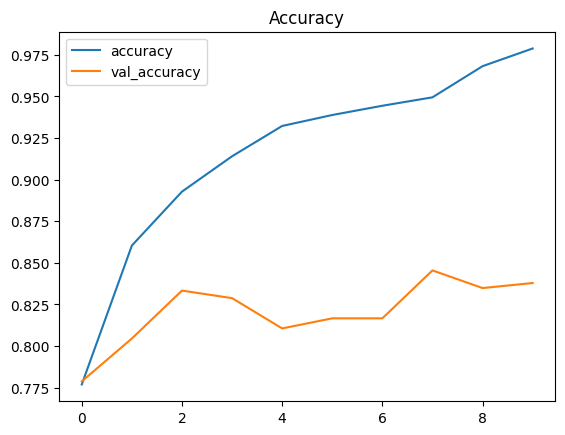

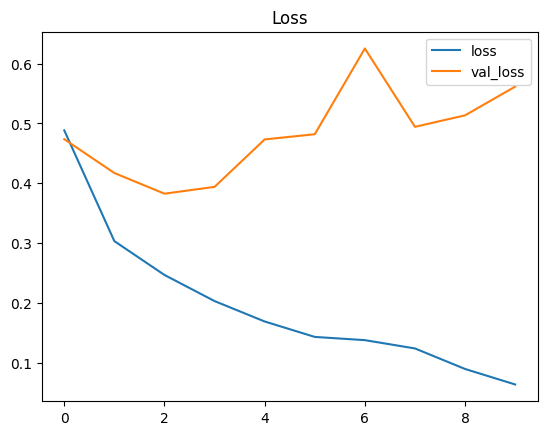

In [20]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

 evaluates the performance of the trained model on a test dataset

In [21]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.56158
Test Accuracy: 83.79%


In [22]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 [==============================] - 9s 372ms/step


In [23]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.85      0.86      0.85       366
   malignant       0.82      0.82      0.82       294

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



thiss designed to visualize a selection of test images alongside their true labels and the predicted labels made by the model

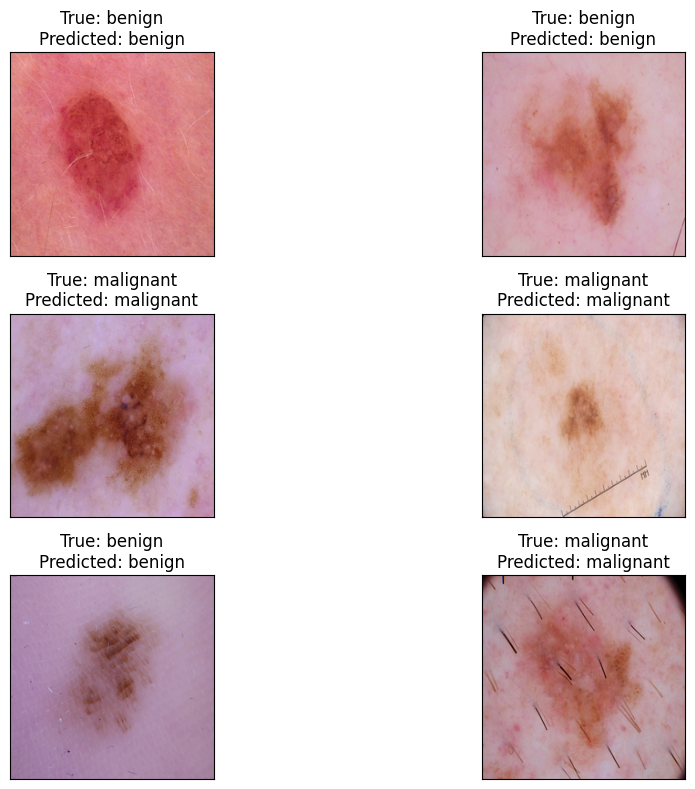

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture based on typical CNN layers for image classification
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output and add Dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularization to reduce overfitting
    
    # Output layer with softmax for multi-class classification
    Dense(2, activation='softmax')  # Adjust for the number of classes
])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

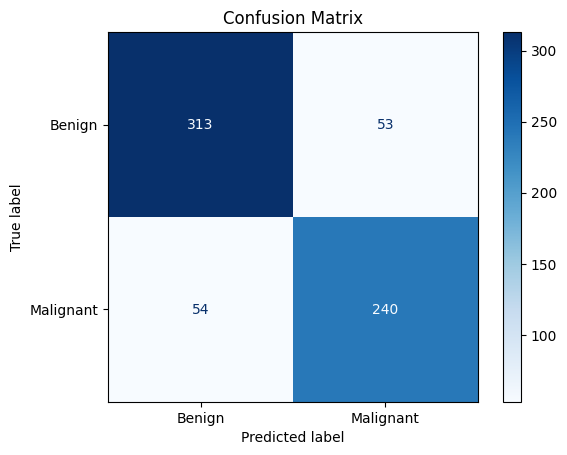


Confusion Matrix:
[[313  53]
 [ 54 240]]


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)